# An Interactive Dashboard for Exploring and Explaining the Performance of Different Intrusion Detection Models using SHAP Values and LIME

## PROJECT OBJECTIVES
*Interactive Dashboard Development*: Design and implement a user-friendly web-based dashboard that integrates various intrusion detection models and provides interactive exploration functionalities
## PROJECT SCOPE AND THE LIMITATIONS
   ## DATA SOURCE : [KDD CUP99]***{https://https://archive.ics.uci.edu/dataset/130/kdd+cup+1999+data}***https://archive.ics.uci.edu/dataset/130/kdd+cup+1999+data
   ## DIGITAL OBJECT IDENTIFIER (DOI) :10.24432/C51C7N
   ## LICENSE: This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.
   ## This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.
   ## CREATORS:
   ## Salvatore Stolfo

   ## - Wei Fan

   ## - Wenke Lee

   ## - Andreas Prodromidis

   ## - Philip Chan


   
## ***copyright: Innocent Paul Ojo***

# IMPORT LIBRARIES AND DEPENDENCIES

In [1]:
import numpy as np
import pandas as pd
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# LOAD DATASETS
The KDD dataset  is  the KDD Cup 1999 dataset, which is widely used in the cybersecurity and machine learning communities for intrusion detection research. The dataset was created for the Third International Knowledge Discovery and Data Mining Tools Competition (KDD Cup 1999).

### Overview of the KDD Cup 1999 Dataset:

1. *Origin*: The dataset is based on the data captured in the DARPA'98 IDS evaluation program by MIT Lincoln Labs. The objective of the DARPA program was to survey and evaluate research in intrusion detection.

2. *Content*: The dataset contains a wide variety of intrusions simulated in a military network environment. It provides a comprehensive, categorized dataset with multiple types of intrusions.

3. *Features*: The dataset has 41 features for each connection record, which are derived from raw TCP/IP connection data. These features can be broadly categorized into:
   - *Basic Features*: Attributes derived from packet headers without looking at the payload (e.g., protocol type, duration).
   - *Content Features*: Attributes used to assess the content of the original packets and are domain-specific (e.g., number of failed login attempts).
   - *Traffic Features*: Attributes that compute statistics related to protocol behavior, service, etc.

4. *Labels*: Each record has a label specifying whether it's a normal connection or an attack. If it's an attack, the dataset specifies the type of attack (e.g., buffer overflow, FTP write, guess password).

5. *Types of Attacks*: The dataset categorizes attacks into four main categories:
   - **Denial of Service (DoS)**: Attackers try to prevent legitimate users from using a service.
   - **Remote to Local (R2L)**: Attackers do not have an account on the victim machine and try to gain access.
   - **User to Root (U2R)**: Attackers have local access and try to gain superuser privileges.
   - *Probing*: Attackers try to gather information about the network.

6. *Size*: The full KDD Cup 1999 dataset is quite large, with nearly 5 million connection records.

7. *Criticism*: While the KDD'99 dataset has been widely used, it has also been criticized for various reasons, including the presence of redundant records and the lack of representation of contemporary attacks. Researchers often preprocess the dataset to remove duplicates and other issues.

This suggests that the dataset has been split into a training set (`kddtrain.csv`) and a test set (`kddtest.csv`) for the purpose of building and evaluating machine learning models. The `header=None` argument indicates that these CSV files do not have a header row, so pandas will use default integer indices for the columns.

## ***copyright: Innocent Paul Ojo***

In [2]:
traindata = pd.read_csv('kddtrain.csv', header=None)
testdata = pd.read_csv('kddtest.csv', header=None)

# EXPLORATORY DATA ANALYSIS (EDA)

In [3]:
# Viewing the first five rows (head) of the DataFrame
print(traindata.head())

   0   1   2   3   4    5     6   7   8   9   ...  32  33   34   35    36  \
0   0   0   1   1   1  181  5450   0   0   0  ...   9   9  1.0  0.0  0.11   
1   0   0   1   1   1  239   486   0   0   0  ...  19  19  1.0  0.0  0.05   
2   0   0   1   1   1  235  1337   0   0   0  ...  29  29  1.0  0.0  0.03   
3   0   0   1   1   1  219  1337   0   0   0  ...  39  39  1.0  0.0  0.03   
4   0   0   1   1   1  217  2032   0   0   0  ...  49  49  1.0  0.0  0.02   

    37   38   39   40   41  
0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  

[5 rows x 42 columns]


## ***copyright: Innocent Paul Ojo***

In [4]:
# Viewing the last five rows (tail) of the DataFrame
print(traindata.tail())

        0   1   2   3   4    5     6   7   8   9   ...  32   33   34   35  \
494016   0   0   1   1   1  310  1881   0   0   0  ...  86  255  1.0  0.0   
494017   0   0   1   1   1  282  2286   0   0   0  ...   6  255  1.0  0.0   
494018   0   0   1   1   1  203  1200   0   0   0  ...  16  255  1.0  0.0   
494019   0   0   1   1   1  291  1200   0   0   0  ...  26  255  1.0  0.0   
494020   0   0   1   1   1  219  1234   0   0   0  ...   6  255  1.0  0.0   

          36    37    38    39   40   41  
494016  0.01  0.05  0.00  0.01  0.0  0.0  
494017  0.17  0.05  0.00  0.01  0.0  0.0  
494018  0.06  0.05  0.06  0.01  0.0  0.0  
494019  0.04  0.05  0.04  0.01  0.0  0.0  
494020  0.17  0.05  0.00  0.01  0.0  0.0  

[5 rows x 42 columns]


## ***copyright: Innocent Paul Ojo***

# Display the data structure of the DataFrame
print(traindata.info())

In [5]:
# Number of rows and columns
num_rows, num_columns = traindata.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

# Number of unique labels in a specific column (replace 'label_column_index' with the actual index of your label column)
label_column_index = -1  # Adjust this to the actual index of your label column
num_labels = traindata.iloc[:, label_column_index].nunique()
print("Number of unique labels:",num_labels)

Number of rows: 494021
Number of columns: 42
Number of unique labels: 101


## ***copyright: Innocent Paul Ojo***

In [6]:
summary_stats = traindata.describe()
print(summary_stats)

                  0              1              2              3   \
count  494021.000000  494021.000000  494021.000000  494021.000000   
mean        0.803089      47.979302       2.189338      38.995435   
std         0.397665     707.746472       0.960704      19.698954   
min         0.000000       0.000000       1.000000       1.000000   
25%         1.000000       0.000000       1.000000      24.000000   
50%         1.000000       0.000000       3.000000      54.000000   
75%         1.000000       0.000000       3.000000      54.000000   
max         1.000000   58329.000000       3.000000      70.000000   

                  4             5             6              7   \
count  494021.000000  4.940210e+05  4.940210e+05  494021.000000   
mean        2.391617  3.025610e+03  8.685324e+02       0.000045   
std         2.649054  9.882181e+05  3.304000e+04       0.006673   
min         1.000000  0.000000e+00  0.000000e+00       0.000000   
25%         1.000000  4.500000e+01  0.00000

In [7]:
column_names = traindata.columns
print(column_names)

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41],
      dtype='int64')


# SPLIT DATASETS FOR TRAINING AND TESTING
## ***copyright: Innocent Paul Ojo***

# FEATURE EXTRACTION

In [8]:
X = traindata.iloc[:,1:42]
Y = traindata.iloc[:,0]
C = testdata.iloc[:,0]
T = testdata.iloc[:,1:42]

# FEATURE SCALING
## ***copyright: Innocent Paul Ojo***

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(traindata)
traindata_scaled = scaler.transform(traindata)
testdata_scaled = scaler.transform(testdata)

# NORMALISATION
## ***copyright: Innocent Paul Ojo***
 Normalizing training and test data using the Normalizer. This can be particularly useful for certain algorithms that work better with normalized data.

In [10]:
scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

In [11]:
scaler = Normalizer().fit(T)
testT = scaler.transform(T)

In [12]:
#converting the prepocessed training data and labels into Numpy arrays.
traindata = np.array(trainX)
trainlabel = np.array(Y)

In [13]:
#convert the prepocessed test data and labels into Numpy arrays.
testdata = np.array(testT)
testlabel = np.array(C)

# USING SUBSETS DATASETS
## ***copyright: Innocent Paul Ojo***

In [14]:
# Convert numpy arrays to pandas DataFrame for sampling
traindata_df = pd.DataFrame(traindata)
trainlabel_df = pd.Series(trainlabel)

# Use a fraction (e.g., 10%) of the data for faster execution
sample_fraction = 0.1
traindata_sample_df = traindata_df.sample(frac=sample_fraction, random_state=42)
trainlabel_sample_df = trainlabel_df[traindata_sample_df.index]

# Convert back to numpy arrays for further processing
traindata_sample = traindata_sample_df.values
trainlabel_sample = trainlabel_sample_df.values


# LOGISTICS REGRESSION SHAP VALUES
## ***copyright: Innocent Paul Ojo***

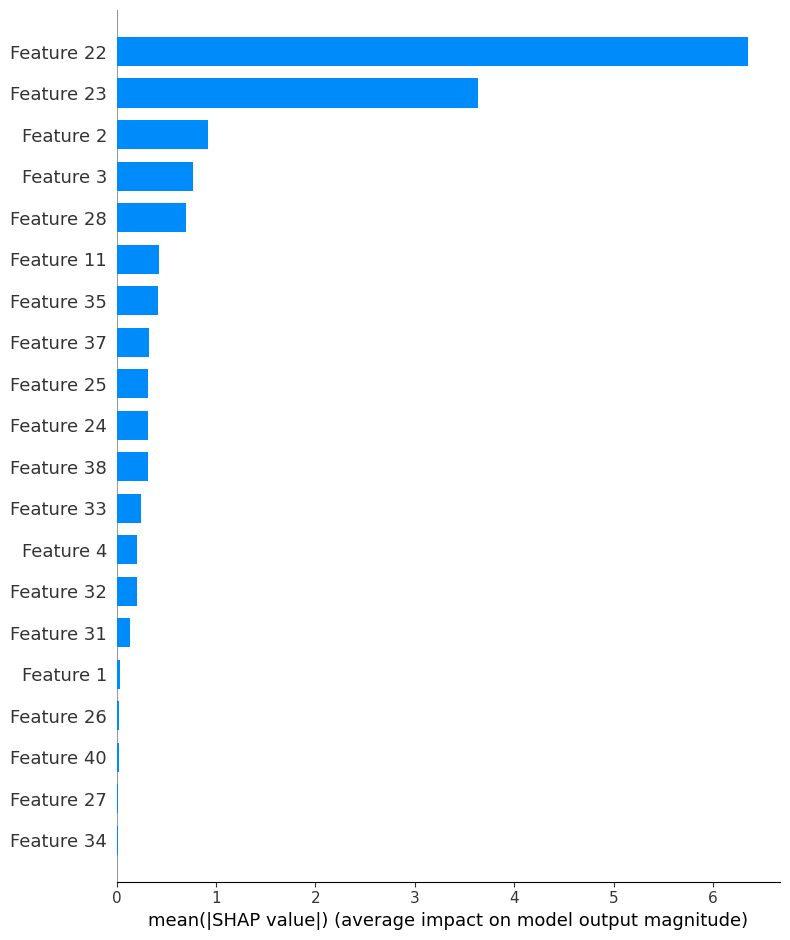

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LogisticRegression
import shap

# Load the datasets
traindata_df = pd.read_csv('kddtrain.csv', header=None)
testdata_df = pd.read_csv('kddtest.csv', header=None)

# SPLIT DATASET FOR TRAINING AND TESTING
X = traindata_df.iloc[:, 1:42]
Y = traindata_df.iloc[:, 0]
C = testdata_df.iloc[:, 0]
T = testdata_df.iloc[:, 1:42]

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
T = scaler.transform(T)

# NORMALISATION
scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

scaler = Normalizer().fit(T)
testT = scaler.transform(T)

# Convert preprocessed training data and labels into NumPy arrays
traindata_np = np.array(trainX)
trainlabel_np = np.array(Y)

# Convert preprocessed test data and labels into NumPy arrays
testdata_np = np.array(testT)
testlabel_np = np.array(C)

# Using a subset of the dataset for faster execution
sample_fraction = 0.1
traindata_sample_df = traindata_df.sample(frac=sample_fraction, random_state=42)
trainlabel_sample_df = Y[traindata_sample_df.index]

# Convert to numpy arrays for further processing
traindata_sample = traindata_sample_df.iloc[:, 1:].values  # Exclude the label column
trainlabel_sample = trainlabel_sample_df.values

# Define the model with increased max_iter to ensure convergence
model = LogisticRegression(max_iter=5000)

# Train the model using the sample data
model.fit(traindata_sample, trainlabel_sample)

# SHAP explanation for a subset of 50 instances
explainer = shap.Explainer(model, traindata_sample)
shap_values = explainer(traindata_sample[:50])
shap.summary_plot(shap_values, traindata_sample[:50], plot_type="bar")

# LIME EXPLAINER
## ***copyright: Innocent Paul Ojo***

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LogisticRegression
from lime import lime_tabular

# Load the datasets
traindata_df = pd.read_csv('kddtrain.csv', header=None)
testdata_df = pd.read_csv('kddtest.csv', header=None)

# SPLIT DATASET FOR TRAINING AND TESTING
X = traindata_df.iloc[:, 1:42]
Y = traindata_df.iloc[:, 0]
C = testdata_df.iloc[:, 0]
T = testdata_df.iloc[:, 1:42]

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
T = scaler.transform(T)

# NORMALISATION
scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

scaler = Normalizer().fit(T)
testT = scaler.transform(T)

# Convert preprocessed training data and labels into NumPy arrays
traindata_np = np.array(trainX)
trainlabel_np = np.array(Y)

# Convert preprocessed test data and labels into NumPy arrays
testdata_np = np.array(testT)
testlabel_np = np.array(C)

# Using a subset of the dataset for faster execution
sample_fraction = 0.1
traindata_sample_df = traindata_df.sample(frac=sample_fraction, random_state=42)
trainlabel_sample_df = Y[traindata_sample_df.index]

# Convert to numpy arrays for further processing
traindata_sample = traindata_sample_df.iloc[:, 1:].values  # Exclude the label column
trainlabel_sample = trainlabel_sample_df.values

# Define the model with increased max_iter to ensure convergence
model = LogisticRegression(max_iter=5000)

# Train the model using the sample data
model.fit(traindata_sample, trainlabel_sample)

# LIME explanation for the first instance
lime_explainer = lime_tabular.LimeTabularExplainer(
    traindata_sample, 
    training_labels=trainlabel_sample, 
    feature_names=traindata_df.columns[1:].tolist(),  # Adjusted feature names to match traindata_sample columns
    mode='classification'
)
exp = lime_explainer.explain_instance(testdata_np[0], model.predict_proba)
exp.show_in_notebook()


# RANDOM FOREST SHAP VALUES
## ***copyright: Innocent Paul Ojo***

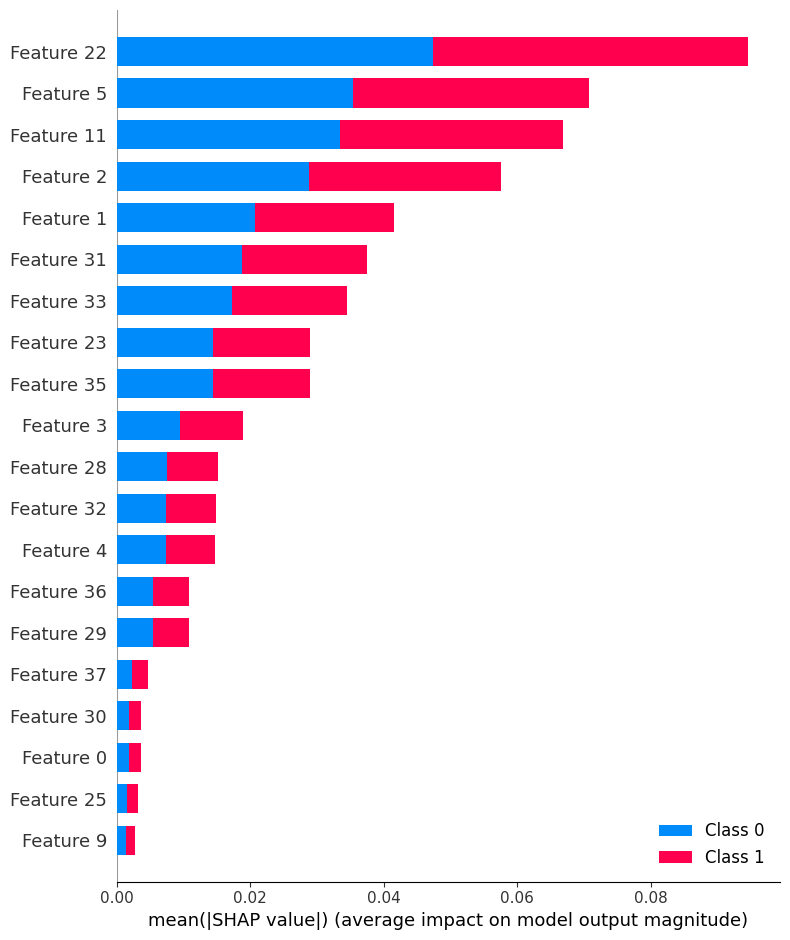

In [17]:
import numpy as np
import pandas as pd
import shap
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier(n_estimators=100)

# Sample 500 data points for faster execution
indices = np.random.choice(len(traindata), 500, replace=False)
traindata_sample = traindata[indices]
trainlabel_sample = trainlabel[indices]

# Train the model
model.fit(traindata_sample, trainlabel_sample)

# SHAP explanation for a subset of 50 instances
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(traindata_sample[:50])
shap.summary_plot(shap_values, traindata_sample[:50], plot_type="bar")


# LIME EXPLAINER

In [18]:
import numpy as np
import pandas as pd
from lime import lime_tabular
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier(n_estimators=100)

# Sample 500 data points for faster execution
train_indices = np.random.choice(len(traindata), 500, replace=False)
traindata_sample = traindata[train_indices]
trainlabel_sample = trainlabel[train_indices]

# Sample data points from testdata
test_indices = np.random.choice(len(testdata), 500, replace=False)
testdata_sample = testdata[test_indices]
testlabel_sample = testlabel[test_indices]

# Train the model
model.fit(traindata_sample, trainlabel_sample)

# LIME explanation for the first instance
lime_explainer = lime_tabular.LimeTabularExplainer(
    traindata_sample, 
    training_labels=trainlabel_sample, 
    mode='classification'
)
exp = lime_explainer.explain_instance(testdata_sample[0], model.predict_proba)
exp.show_in_notebook()


# DECISION TREE SHAPS VALUE
## ***copyright: Innocent Paul Ojo***

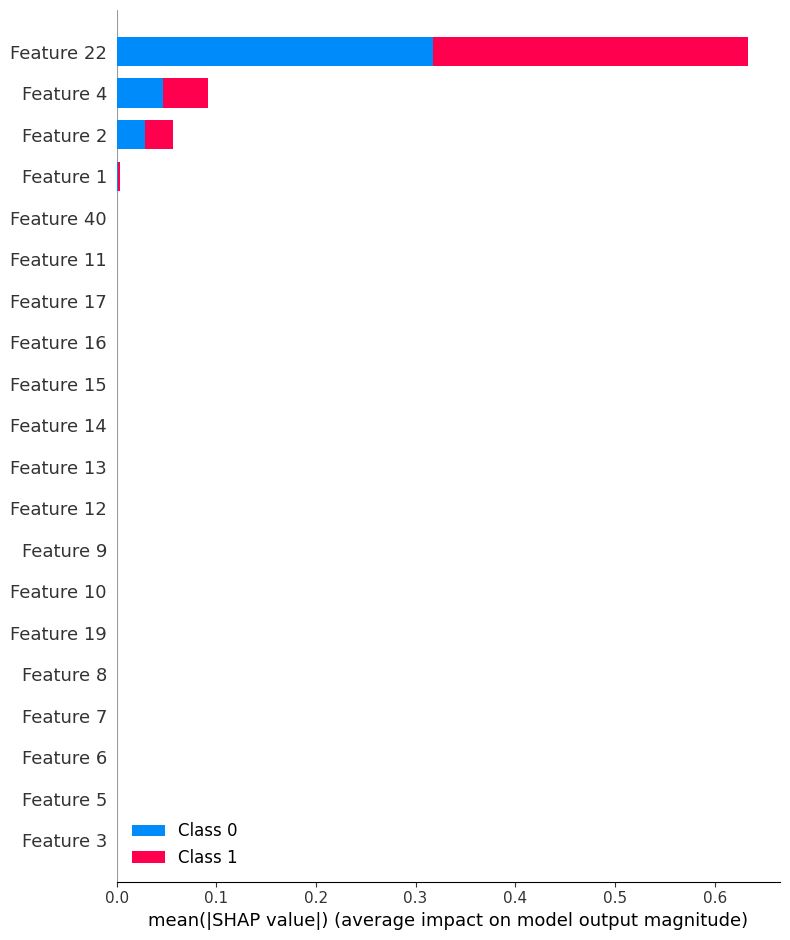

In [19]:
import numpy as np
import pandas as pd
import shap
from sklearn.tree import DecisionTreeClassifier

# Define the model
model = DecisionTreeClassifier()

# Sample 500 data points for faster execution
indices = np.random.choice(len(traindata), 500, replace=False)
traindata_sample = traindata[indices]
trainlabel_sample = trainlabel[indices]

# Train the model
model.fit(traindata_sample, trainlabel_sample)

# SHAP explanation for a subset of 50 instances
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(traindata_sample[:50])
shap.summary_plot(shap_values, traindata_sample[:50], plot_type="bar")


# LIME EXPLAINER

In [20]:

# Train the model
model.fit(traindata_sample, trainlabel_sample)

# LIME explanation for the first instance
lime_explainer = lime_tabular.LimeTabularExplainer(
    traindata_sample, 
    training_labels=trainlabel_sample, 
    mode='classification'
)
exp = lime_explainer.explain_instance(testdata_sample[0], model.predict_proba)
exp.show_in_notebook()


# NEURAL NETWORK SHAPS VALUES AND LIME EXPLAINER

## ***copyright: Innocent Paul Ojo***

100%|██████████| 50/50 [00:39<00:00,  1.28it/s]


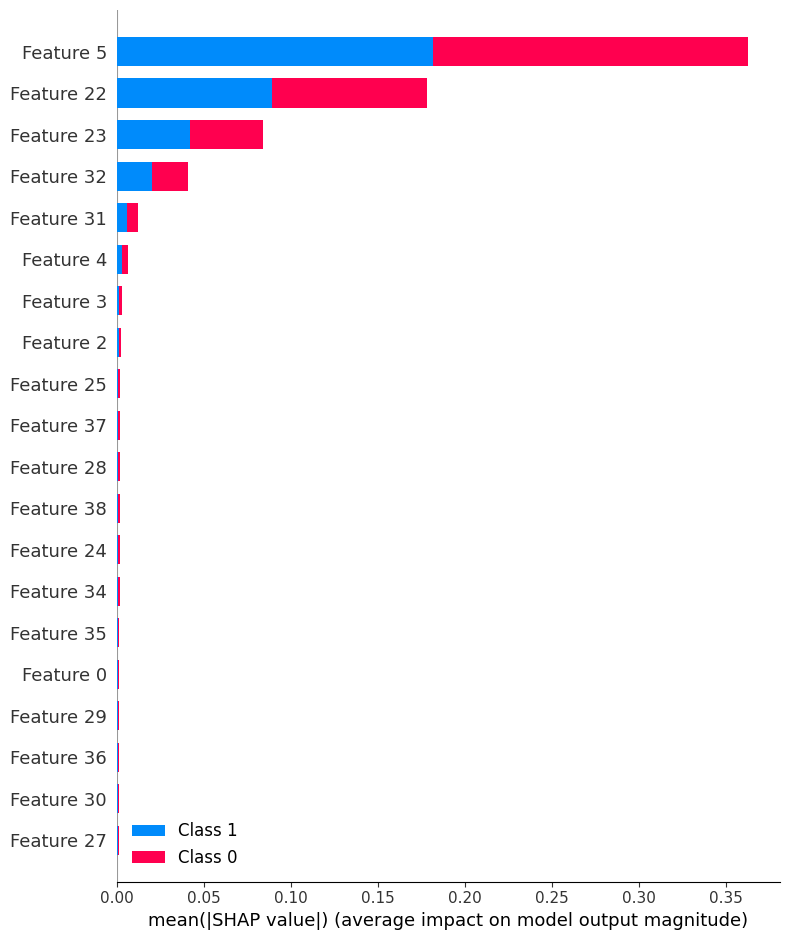

In [21]:
import numpy as np
import pandas as pd
import shap
from sklearn.neural_network import MLPClassifier

# Define the model
model = MLPClassifier(max_iter=1000, hidden_layer_sizes=(50,))

# Sample 500 data points for faster execution
indices = np.random.choice(len(traindata), 500, replace=False)
traindata_sample = traindata[indices]
trainlabel_sample = trainlabel[indices]

# Train the model
model.fit(traindata_sample, trainlabel_sample)

# SHAP explanation for a subset of 50 instances
# Using KernelExplainer for MLPClassifier
background_data = traindata_sample[np.random.choice(traindata_sample.shape[0], 100, replace=False)]  # Random subset of training data
explainer = shap.KernelExplainer(model.predict_proba, background_data)
shap_values = explainer.shap_values(traindata_sample[:50])
shap.summary_plot(shap_values, traindata_sample[:50], plot_type="bar")

# LIME EXPLAINER

In [22]:
import numpy as np
import pandas as pd
from lime import lime_tabular
from sklearn.neural_network import MLPClassifier

# Define the model
model = MLPClassifier(max_iter=1000, hidden_layer_sizes=(50,))

# Sample 500 data points for faster execution
indices = np.random.choice(len(traindata), 500, replace=False)
traindata_sample = traindata[indices]
trainlabel_sample = trainlabel[indices]

# Train the model
model.fit(traindata_sample, trainlabel_sample)

# LIME explanation for the first instance
lime_explainer = lime_tabular.LimeTabularExplainer(
    traindata_sample, 
    training_labels=trainlabel_sample, 
    mode='classification'
)
exp = lime_explainer.explain_instance(testdata_sample[0], model.predict_proba)
exp.show_in_notebook()

# XGBOOST SHAP VALUES AND LIME EXPLAINER

## ***copyright: Innocent Paul Ojo***

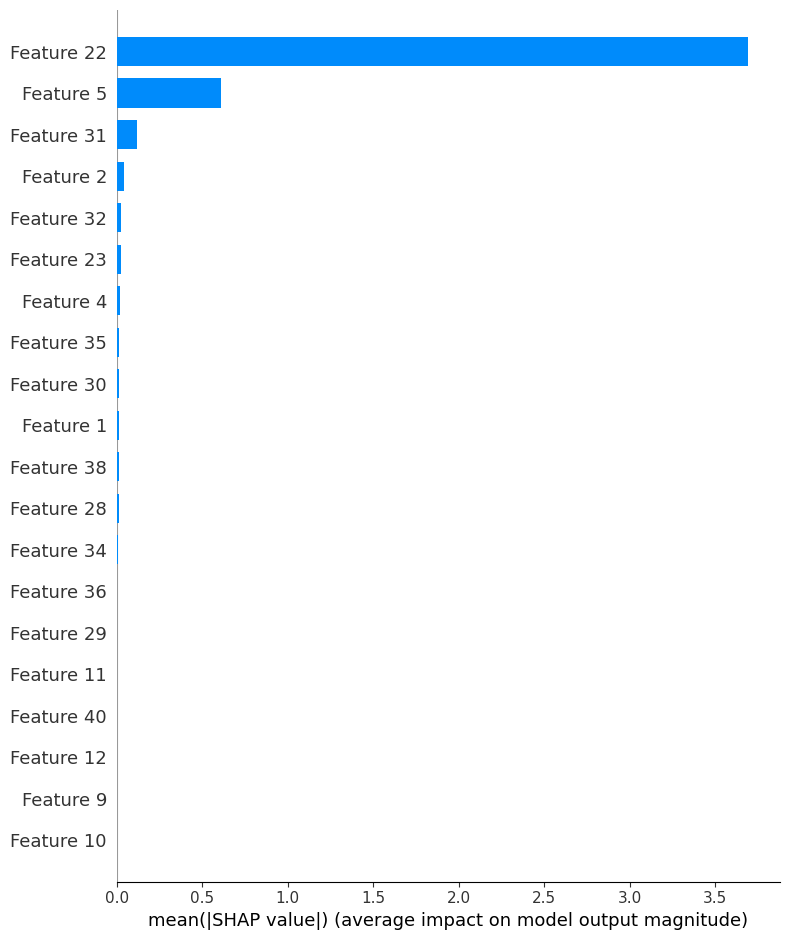

In [23]:
import numpy as np
import pandas as pd
import shap
import xgboost as xgb

# Define the XGBoost model
model = xgb.XGBClassifier(max_depth=5, n_estimators=100, learning_rate=0.05)

# Sample 500 data points for faster execution
indices = np.random.choice(len(traindata), 500, replace=False)
traindata_sample = traindata[indices]
trainlabel_sample = trainlabel[indices]

# Train the model
model.fit(traindata_sample, trainlabel_sample)

# SHAP explanation for a subset of 50 instances
explainer = shap.Explainer(model)
shap_values = explainer(traindata_sample[:50])
shap.summary_plot(shap_values, traindata_sample[:50], plot_type="bar")


# LIME EXPLAINER

In [24]:
import numpy as np
import pandas as pd
from lime import lime_tabular
import xgboost as xgb

# Define the XGBoost model
model = xgb.XGBClassifier(max_depth=5, n_estimators=100, learning_rate=0.05)

# Sample 500 data points for faster execution
indices = np.random.choice(len(traindata), 500, replace=False)
traindata_sample = traindata[indices]
trainlabel_sample = trainlabel[indices]

# Train the model
model.fit(traindata_sample, trainlabel_sample)

# LIME explanation for the first instance
lime_explainer = lime_tabular.LimeTabularExplainer(
    traindata_sample, 
    training_labels=trainlabel_sample, 
    mode='classification'
)
exp = lime_explainer.explain_instance(testdata_sample[0], model.predict_proba)
exp.show_in_notebook()

# CREATING A DATASET FOR RESULT_DF
## ***copyright: Innocent Paul Ojo***

In [25]:
import os
import numpy as np
import pandas as pd
import shap
from lime import lime_tabular
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb


In [26]:
import os
import pandas as pd

# Convert to DataFrame if they are numpy arrays
if isinstance(traindata, np.ndarray):
    traindata = pd.DataFrame(traindata)
if isinstance(testdata_sample, np.ndarray):
    testdata_sample = pd.DataFrame(testdata_sample)

# Sample 500 data points for faster execution
indices = np.random.choice(len(traindata), 500, replace=False)
traindata_sample = traindata.iloc[indices]
trainlabel_sample = trainlabel[indices]

# Ensure that traindata_sample and testdata_sample have the same columns
testdata_sample = testdata_sample.reindex(columns=traindata_sample.columns, fill_value=0)

# List of models
models = [
    ("Logistic Regression", LogisticRegression(max_iter=10000)),  
    ("Random Forest", RandomForestClassifier(n_estimators=100)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Neural Network", MLPClassifier(max_iter=1000, hidden_layer_sizes=(50,))),
    ("XGBoost", xgb.XGBClassifier(max_depth=5, n_estimators=100, learning_rate=0.05)),
    
]

all_metrics = []

for model_name, model in models:
    # Train the model
    model.fit(traindata_sample, trainlabel_sample)
    
    # Predict on test data
    predictions = model.predict(testdata_sample)
    
    # Calculate performance metrics
    accuracy = accuracy_score(testlabel_sample, predictions)
    precision = precision_score(testlabel_sample, predictions, average='weighted', zero_division=0)
    recall = recall_score(testlabel_sample, predictions, average='weighted')
    f1 = f1_score(testlabel_sample, predictions, average='weighted')
    
    metrics = [("Accuracy", accuracy), ("Precision", precision), ("Recall", recall), ("F1-Score", f1)]
    
    for metric_name, metric_value in metrics:
        all_metrics.append([model_name, metric_name, metric_value])

# Convert all metrics to DataFrame and save to CSV
results_df = pd.DataFrame(all_metrics, columns=["ALGORITHM", "METRICS", "VALUE"])
results_df.to_csv("Models_Performance_Metrics.csv", index=False)


## ***copyright: Innocent Paul Ojo***

In [27]:
import os
import pandas as pd
import shap
from sklearn.cluster import KMeans

# Convert to DataFrame if they are numpy arrays
if isinstance(traindata, np.ndarray):
    traindata = pd.DataFrame(traindata)
if isinstance(testdata_sample, np.ndarray):
    testdata_sample = pd.DataFrame(testdata_sample)

# Sample 500 data points for faster execution
indices = np.random.choice(len(traindata), 500, replace=False)
traindata_sample = traindata.iloc[indices]
trainlabel_sample = trainlabel[indices]

# Ensure that traindata_sample and testdata_sample have the same columns
testdata_sample = testdata_sample.reindex(columns=traindata_sample.columns, fill_value=0)

# List of models
models = [
    ("Logistic Regression", LogisticRegression(max_iter=10000)),  
    ("Random Forest", RandomForestClassifier(n_estimators=100)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Neural Network", MLPClassifier(max_iter=1000, hidden_layer_sizes=(50,))),
    ("XGBoost", xgb.XGBClassifier(max_depth=5, n_estimators=100, learning_rate=0.05)),

]

# Create directory to store SHAP values
output_directory = "Average_SHAP_Values"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

all_shap_values = []

for model_name, model in models:
    # Train the model
    model.fit(traindata_sample, trainlabel_sample)
    
    # SHAP explanation
    kmeans = KMeans(n_clusters=100, n_init=10).fit(traindata_sample)
    background_data = kmeans.cluster_centers_
    
    if model_name in ["Random Forest", "Decision Tree", "XGBoost"]:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(traindata_sample)
    else:
        explainer = shap.KernelExplainer(model.predict_proba, background_data)
        shap_values = explainer.shap_values(testdata_sample.iloc[:50].values)
    
    # Calculate average SHAP values
    shap_values_avg = pd.DataFrame(shap_values[0] if isinstance(shap_values, list) else shap_values).mean(axis=0)
    shap_values_avg.name = model_name
    all_shap_values.append(shap_values_avg)

# Combine all average SHAP values into a single DataFrame
df_all_shap_values = pd.concat(all_shap_values, axis=1)

# Save the combined average SHAP values to a single CSV
df_all_shap_values.to_csv(os.path.join(output_directory, "all_average_shap_values.csv"))


100%|██████████| 50/50 [00:38<00:00,  1.31it/s]


## ***copyright: Innocent Paul Ojo***

In [28]:
import os
import pandas as pd
import lime
import lime.lime_tabular
from sklearn.cluster import KMeans

# Convert to DataFrame if they are numpy arrays
if isinstance(traindata, np.ndarray):
    traindata = pd.DataFrame(traindata)
if isinstance(testdata_sample, np.ndarray):
    testdata_sample = pd.DataFrame(testdata_sample)

# Sample 500 data points for faster execution
indices = np.random.choice(len(traindata), 500, replace=False)
traindata_sample = traindata.iloc[indices]
trainlabel_sample = trainlabel[indices]

# Ensure that traindata_sample and testdata_sample have the same columns
testdata_sample = testdata_sample.reindex(columns=traindata_sample.columns, fill_value=0)

# List of models
models = [
    ("Logistic Regression", LogisticRegression(max_iter=10000)),  
    ("Random Forest", RandomForestClassifier(n_estimators=100)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Neural Network", MLPClassifier(max_iter=1000, hidden_layer_sizes=(50,))),
    ("XGBoost", xgb.XGBClassifier(max_depth=5, n_estimators=100, learning_rate=0.05)),
    
]

# Create directory to store LIME values
output_directory = "Average_LIME_Values"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

all_lime_values = []

for model_name, model in models:
    # Train the model
    model.fit(traindata_sample, trainlabel_sample)
    
    # LIME explanation
    lime_explainer = lime.lime_tabular.LimeTabularExplainer(traindata_sample.values, training_labels=trainlabel_sample, mode='classification', feature_names=traindata_sample.columns.tolist())
    
    # Calculate average LIME values for a subset of the test data
    lime_values_list = []
    for instance in testdata_sample.iloc[:50].values:
        exp = lime_explainer.explain_instance(instance, model.predict_proba)
        lime_values = dict(exp.as_list())
        lime_values_list.append(lime_values)
    
    df_lime_values = pd.DataFrame(lime_values_list).fillna(0)
    lime_values_avg = df_lime_values.mean(axis=0)
    lime_values_avg.name = model_name
    all_lime_values.append(lime_values_avg)

# Combine all average LIME values into a single DataFrame
df_all_lime_values = pd.concat(all_lime_values, axis=1)

# Save the combined average LIME values to a single CSV
df_all_lime_values.to_csv(os.path.join(output_directory, "all_average_lime_values.csv"))


## ***copyright: Innocent Paul Ojo***

In [29]:
# Dash imports
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc

# Plotly imports
import plotly.express as px
import plotly.graph_objects as go

# Other necessary imports
import pandas as pd

import base64
import io
import plotly.io as pio

## ***copyright: Innocent Paul Ojo***

In [30]:
# Load datasets
performance_metrics = pd.read_csv("all_model_performance_metrics.csv")
shap_values = pd.read_csv("all_average_shap_values.csv").drop(columns=['Unnamed: 0'])
lime_values = pd.read_csv("all_average_lime_values.csv").drop(columns=['Unnamed: 0'])

# Compute mean and standard deviation for each algorithm's LIME and SHAP values
algorithms = ["Logistic Regression", "Random Forest", "Decision Tree", "Neural Network", "XGBoost", ]

lime_mean = lime_values[algorithms].mean()
lime_std = lime_values[algorithms].std()

shap_mean = shap_values[algorithms].mean()
shap_std = shap_values[algorithms].std()

# Initialize the Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.DARKLY])

# Define the app layout
app.layout = html.Div(style={'backgroundColor': '#111111'}, children=[
    html.H1("Dashboard", style={'color': 'white'}),
    
    dcc.Dropdown(
        id='dataset-dropdown',
        options=[
            {'label': 'Performance Metrics', 'value': 'performance_metrics'},
            {'label': 'SHAP Values', 'value': 'shap_values'},
            {'label': 'LIME Values', 'value': 'lime_values'}
        ],
        value='performance_metrics',
        style={'color': 'black'}
    ),
    
    dcc.Slider(
        id='value-slider',
        min=0,
        max=1,
        step=0.0001,
        value=0.5,
        marks={i/10: f'{i/10:.4f}' for i in range(11)}
    ),
    
    
    dcc.Graph(id='main-graph', style={'height': '80vh', 'width': '90vw'}),
    

    html.Div(id='stats-display', style={'color': 'white'}),
    
    html.A("Download Plot", id='download-link', download="plot.png", href="", target="_blank")
])

@app.callback(
    Output('main-graph', 'figure'),
    [Input('dataset-dropdown', 'value'),
     Input('value-slider', 'value')]
)
def update_graph(selected_dataset, slider_value):
    if selected_dataset == 'performance_metrics':
        fig = px.scatter_3d(performance_metrics, x='ALGORITHM', y='METRICS', z='VALUE', color='ALGORITHM')
    elif selected_dataset == 'shap_values':
        fig = px.scatter(shap_values, x=shap_values.index, y=algorithms, title="Average SHAP Values")
    else:
        fig = px.scatter(lime_values, x=lime_values.index, y=algorithms, title="Average LIME Values")
    
    return fig

@app.callback(
    Output('stats-display', 'children'),
    [Input('dataset-dropdown', 'value')]
)
def display_stats(selected_dataset):
    if selected_dataset == 'performance_metrics':
        return []  # No stats to display for performance metrics
    elif selected_dataset == 'shap_values':
        mean_values = shap_mean
        std_values = shap_std
    else:
        mean_values = lime_mean
        std_values = lime_std

    stats = [
        html.H3("Mean Values"),
        html.P(str(mean_values)),
        html.H3("Standard Deviation Values"),
        html.P(str(std_values))
    ]
    return stats


@app.callback(
    Output('download-link', 'href'),
    [Input('main-graph', 'figure')]
)
def update_download_link(figure):
    # Convert the current figure to a PNG format
    img_bytes = pio.to_image(figure, format="png")
    
    # Encode the PNG bytes to base64
    encoded_img = base64.b64encode(img_bytes).decode("utf-8")
    
    # Create the href attribute for the download link
    href = f"data:image/png;base64,{encoded_img}"
    
    return href





    
if __name__ == '__main__':
    app.run_server(debug=True)


# DASHBOARD URL
## ***copyright: Innocent Paul Ojo***

http://127.0.0.1:8050/